In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array

C:\Users\V.L.S RUTHWIK\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=30,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    "./data/train",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "./data/test",
    target_size=(64,64),
    batch_size=32,
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode='categorical')

Found 735 images belonging to 7 classes.
Found 315 images belonging to 7 classes.


In [3]:
model = Sequential([
      tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(64, 64, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
#       tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#       tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(7, activation='softmax')
])
    
model.compile(optimizer = 'adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [4]:
epochs = 20

history = model.fit(x = train_generator,validation_data=test_generator ,batch_size=32,verbose=1, epochs=epochs)

Epoch 1/20
23/23 [==============================] - 8s 310ms/step - loss: 1.7682 - accuracy: 0.2789 - val_loss: 1.1420 - val_accuracy: 0.6857
Epoch 2/20
23/23 [==============================] - 6s 280ms/step - loss: 0.9560 - accuracy: 0.6245 - val_loss: 0.7275 - val_accuracy: 0.7524
Epoch 3/20
23/23 [==============================] - 6s 277ms/step - loss: 0.6116 - accuracy: 0.7673 - val_loss: 0.5608 - val_accuracy: 0.8000
Epoch 4/20
23/23 [==============================] - 6s 280ms/step - loss: 0.5261 - accuracy: 0.7959 - val_loss: 0.5924 - val_accuracy: 0.7968
Epoch 5/20
23/23 [==============================] - 6s 277ms/step - loss: 0.3873 - accuracy: 0.8544 - val_loss: 0.3237 - val_accuracy: 0.9048
Epoch 6/20
23/23 [==============================] - 6s 275ms/step - loss: 0.3728 - accuracy: 0.8680 - val_loss: 0.4825 - val_accuracy: 0.8222
Epoch 7/20
23/23 [==============================] - 7s 284ms/step - loss: 0.2634 - accuracy: 0.9129 - val_loss: 0.2622 - val_accuracy: 0.9238
Epoch 

In [5]:
model.evaluate(test_generator)

10/10 [==============================] - 1s 101ms/step - loss: 0.0964 - accuracy: 0.9683


[0.09643387794494629, 0.9682539701461792]

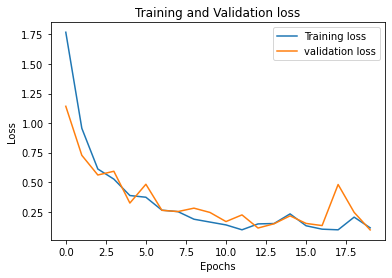

In [6]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
ep = range(epochs)
plt.plot(ep, loss_train, label='Training loss')
plt.plot(ep, loss_val, label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

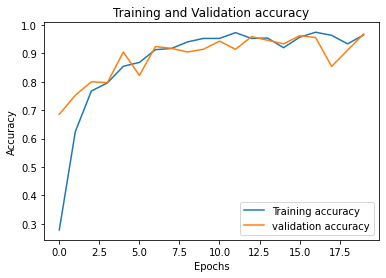

In [7]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
ep = range(epochs)
plt.plot(ep, loss_train,label='Training accuracy')
plt.plot(ep, loss_val, label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
def single_predict(file):
    test_image=load_img(file, target_size=(64,64))
    test_image=img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    sorted_classes = ['10', '100', '20', '200', '2000', '50', '500']
    return sorted_classes[result.argmax()]

In [23]:
single_predict("data/single/10rs.jpg")

1/1 [==============================] - 0s 24ms/step


'10'